In [6]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

from script_enstrophy import load_enstrophy_df

## Enstrophy Distributions 

In [7]:
data_id = "shear_flow"
df = load_enstrophy_df(data_id=data_id)

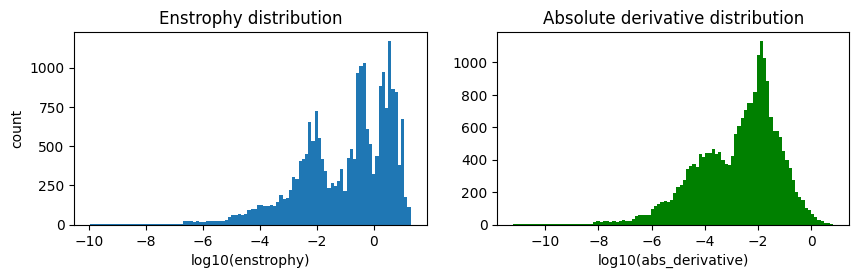

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 2.5))

axs[0].hist(np.log10(df['enstrophy']), bins=100)
axs[0].set_xlabel('log10(enstrophy)')
axs[0].set_ylabel('count')
axs[0].set_title('Enstrophy distribution')

axs[1].hist(np.log10(df['abs_derivative']), bins=100, color='green')
axs[1].set_xlabel('log10(abs_derivative)')
axs[1].set_title('Absolute derivative distribution')

plt.show()

In [9]:
# Filter by absolute derivative
fdf = df.filter(np.log10(df['abs_derivative']) > 0 )
ids = fdf['id'].unique().to_list()

# Sort by median absolute derivative
group = df.group_by('id', 'filename').agg(pl.col('abs_derivative').median().alias('median_abs_derivative')).sort('median_abs_derivative', descending=True)
mean_ids = group[:20]['id'].to_list()
print(f"Top 20 trajectories: {mean_ids}")
print(f"Trajectories in both groups: {sorted(set(mean_ids).intersection(ids))}")
group = group.sort("median_abs_derivative", descending=False)
print(f"Bottom 20 trajectories: {group[:20]['id'].sort().to_list()}")
# group.head()

# I ended up taking the 20 trajectories with the greatest median enstrophy after looking at the videos


Top 20 trajectories: [50, 86, 75, 29, 110, 43, 87, 88, 101, 45, 51, 65, 41, 99, 94, 96, 63, 59, 72, 80]
Trajectories in both groups: [29, 41, 43, 50, 59, 75, 80, 86, 87, 88, 110]
Bottom 20 trajectories: [2, 3, 4, 8, 9, 15, 18, 19, 21, 26, 36, 46, 54, 55, 57, 79, 84, 90, 92, 103]


In [10]:
group = df.group_by('id', 'filename').agg(pl.col('abs_derivative').median().alias('median_abs_derivative')).sort('median_abs_derivative', descending=True)

group[:20].head()

id,filename,median_abs_derivative
i32,str,f64
50,"""metrics/enstrophy/shear_flow/s…",0.195091
86,"""metrics/enstrophy/shear_flow/s…",0.135356
75,"""metrics/enstrophy/shear_flow/s…",0.118155
29,"""metrics/enstrophy/shear_flow/s…",0.106643
110,"""metrics/enstrophy/shear_flow/s…",0.098753


(array([60.,  7., 10.,  2.,  4.,  3.,  9.,  2.,  2.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.61311040e-08, 3.90183581e-03, 7.80365549e-03, 1.17054752e-02,
        1.56072948e-02, 1.95091145e-02, 2.34109342e-02, 2.73127539e-02,
        3.12145736e-02, 3.51163932e-02, 3.90182129e-02, 4.29200326e-02,
        4.68218523e-02, 5.07236719e-02, 5.46254916e-02, 5.85273113e-02,
        6.24291310e-02, 6.63309506e-02, 7.02327703e-02, 7.41345900e-02,
        7.80364097e-02, 8.19382294e-02, 8.58400490e-02, 8.97418687e-02,
        9.36436884e-02, 9.75455081e-02, 1.01447328e-01, 1.05349147e-01,
        1.09250967e-01, 1.13152787e-01, 1.17054606e-01, 1.20956426e-01,
        1.24858246e-01, 1.28760065e-01, 1.32661885e-01, 1.36563705e-01,
        1.40465525e-01, 1.44367344e-01, 1.48269164e-01, 1.52170984e-

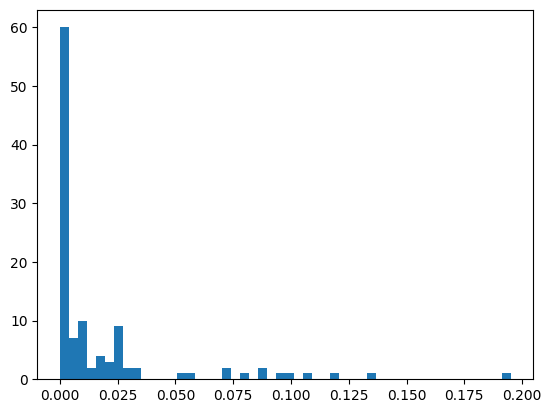

In [12]:
plt.hist(group['median_abs_derivative'], bins=50)